In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy.linalg as LA

# Primera parte

In [73]:
data = pd.read_csv('dengue.csv')
data.shape

(2000, 14)

In [74]:
data.head()


,Unnamed: 0,humid,humid90,temp,temp90,h10pix,h10pix90,trees,trees90,NoYes,Xmin,Xmax,Ymin,Ymax
0,1,0.671389,4.416667,2.037500,8.470835,17.356529,17.808611,0.0,1.5,0,70.5,74.5,38.0,35.5
1,2,7.648334,8.167500,12.325000,14.925000,10.983610,11.691670,0.0,1.0,0,62.5,64.5,35.5,34.5
2,3,6.979056,9.563058,6.925000,14.591660,17.508329,17.625280,0.0,1.2,0,68.5,69.5,36.0,35.0
3,4,1.110416,1.825361,4.641665,6.046669,17.417635,17.516939,0.0,0.6,0,67.0,68.0,35.0,34.0
4,5,9.027055,9.742751,18.175000,19.710000,13.843060,13.843060,0.0,0.0,0,61.0,64.5,33.5,32.0


In [75]:
feats = ['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']
print(feats)

['humid', 'temp', 'h10pix', 'trees', 'Xmin', 'Ymin']


In [76]:
data = data.dropna()
data[feats]=(data[feats]-data[feats].mean())/data[feats].std()

For n_clusters = 2 The average silhouette_score is : 0.40811225183136596
For n_clusters = 3 The average silhouette_score is : 0.3283430228750958
For n_clusters = 4 The average silhouette_score is : 0.31718631031237315
For n_clusters = 5 The average silhouette_score is : 0.2782836078378786
For n_clusters = 6 The average silhouette_score is : 0.3083836810634285
For n_clusters = 7 The average silhouette_score is : 0.2933956856085943
For n_clusters = 8 The average silhouette_score is : 0.29285160409162087
For n_clusters = 9 The average silhouette_score is : 0.3060908521736031
For n_clusters = 10 The average silhouette_score is : 0.3070898683026877
For n_clusters = 11 The average silhouette_score is : 0.3123202832477524
For n_clusters = 12 The average silhouette_score is : 0.3067388676272633
For n_clusters = 13 The average silhouette_score is : 0.3184483446493269
For n_clusters = 14 The average silhouette_score is : 0.3244960878229104
For n_clusters = 15 The average silhouette_score is : 0.

/home/mauro/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 22 The average silhouette_score is : 0.30964829303028296
For n_clusters = 23 The average silhouette_score is : 0.30496932386493514
For n_clusters = 24 The average silhouette_score is : 0.2937644644401641
For n_clusters = 25 The average silhouette_score is : 0.30567823335010325
For n_clusters = 26 The average silhouette_score is : 0.318569798676773
For n_clusters = 27 The average silhouette_score is : 0.3069507146359977
For n_clusters = 28 The average silhouette_score is : 0.31236222673690606
For n_clusters = 29 The average silhouette_score is : 0.31725074141345105


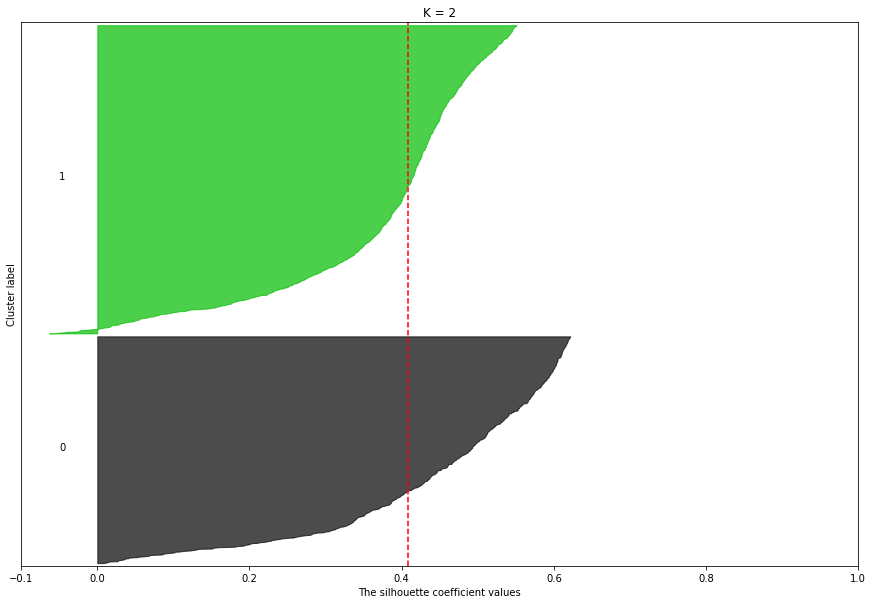

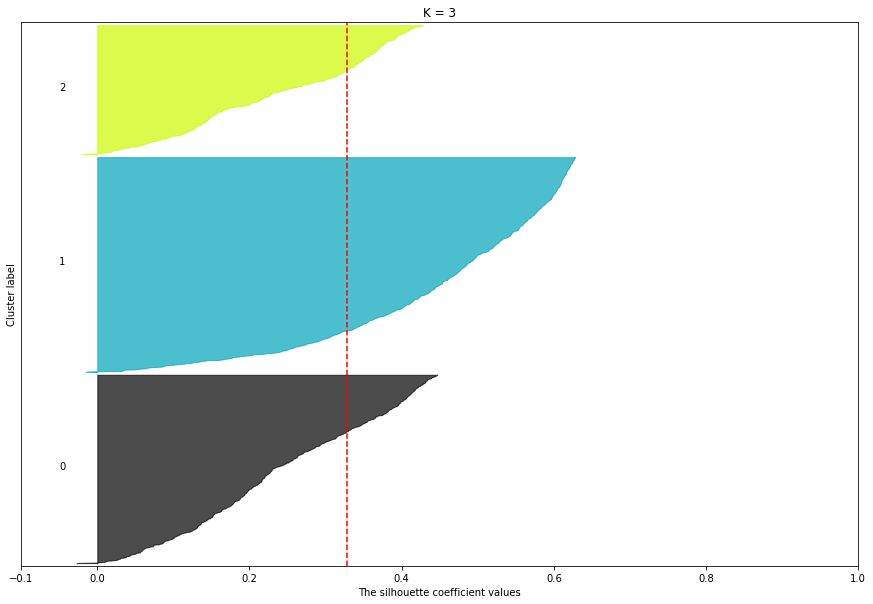

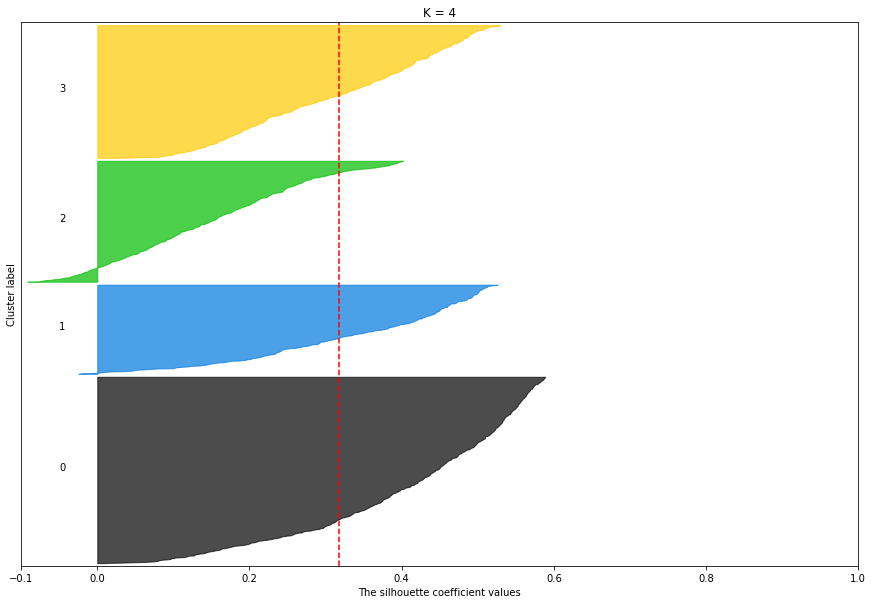

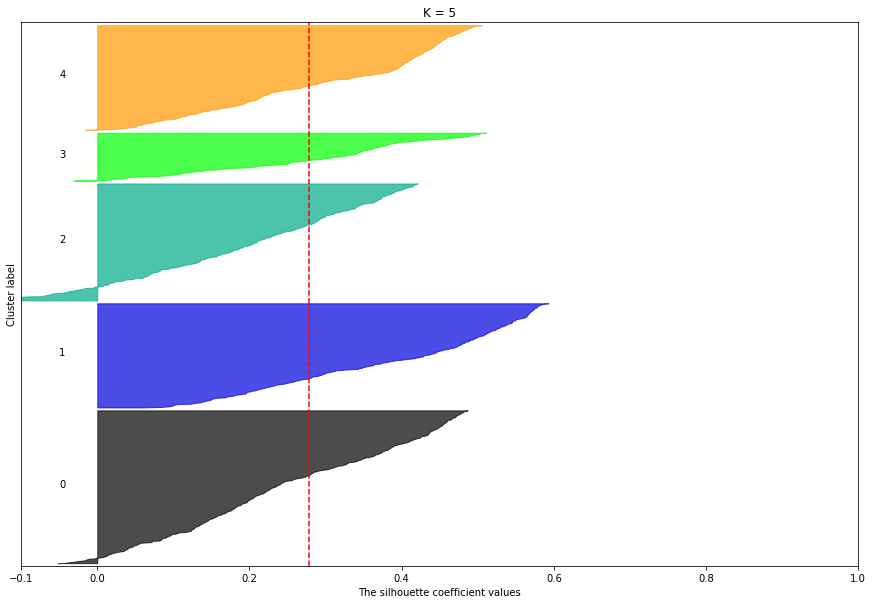

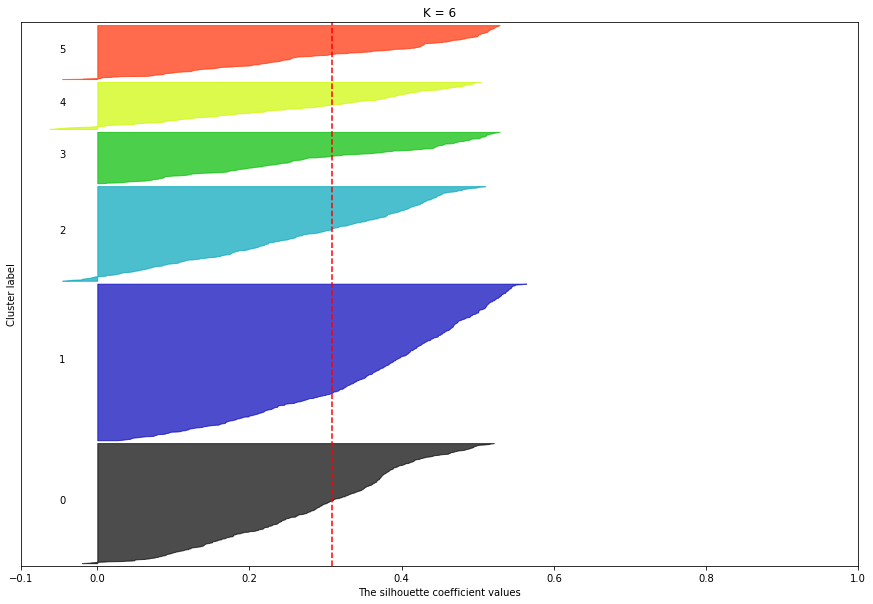

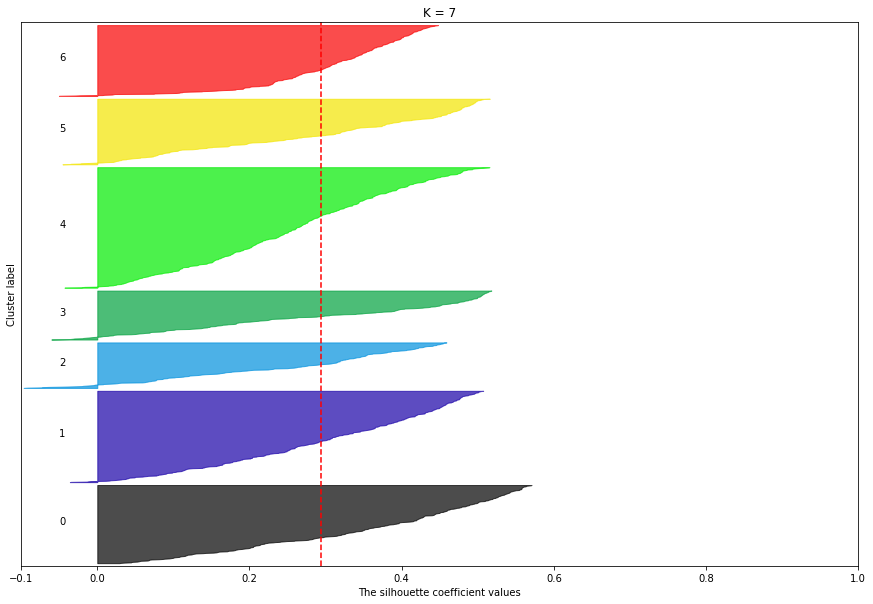

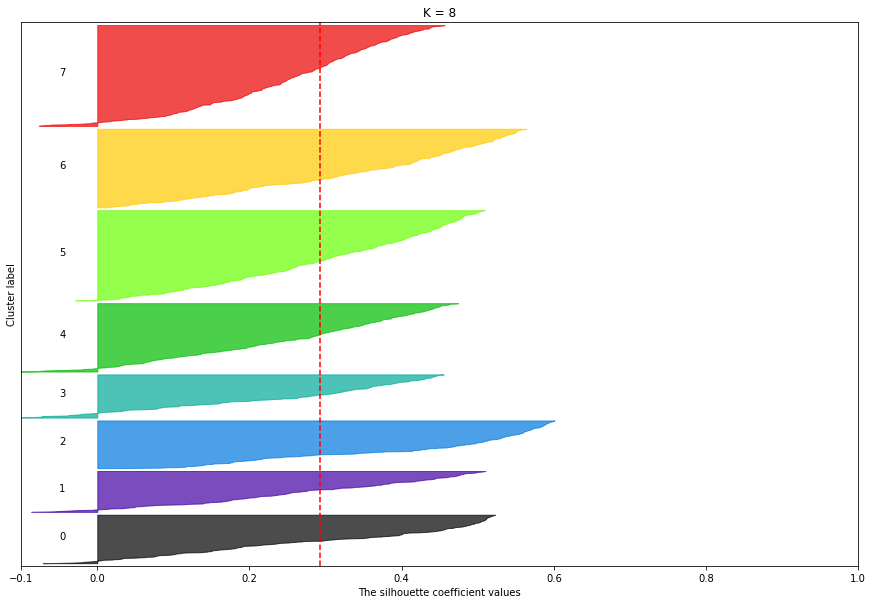

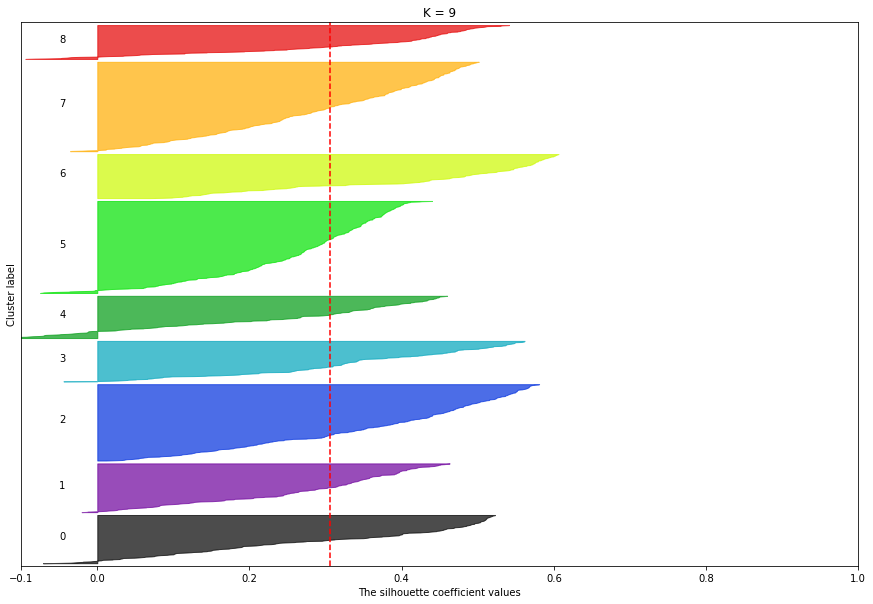

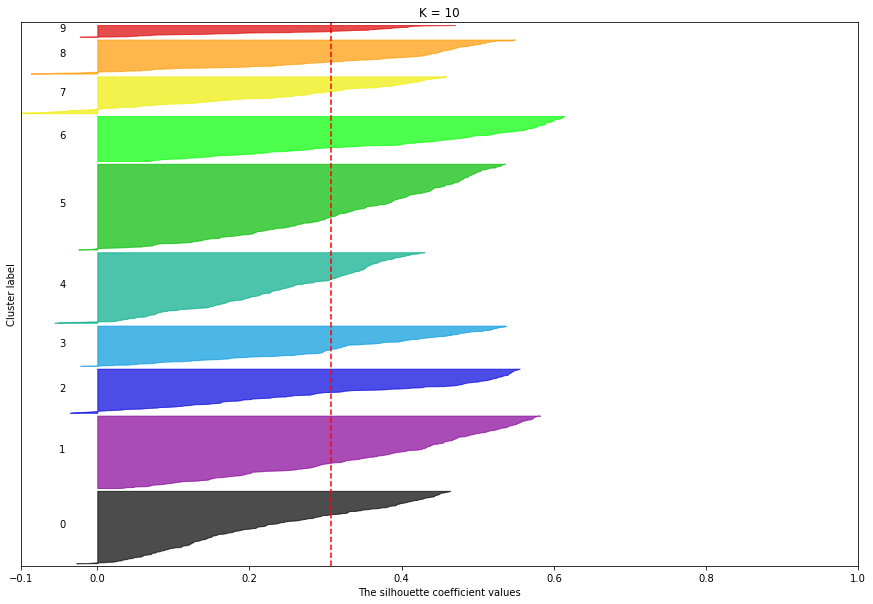

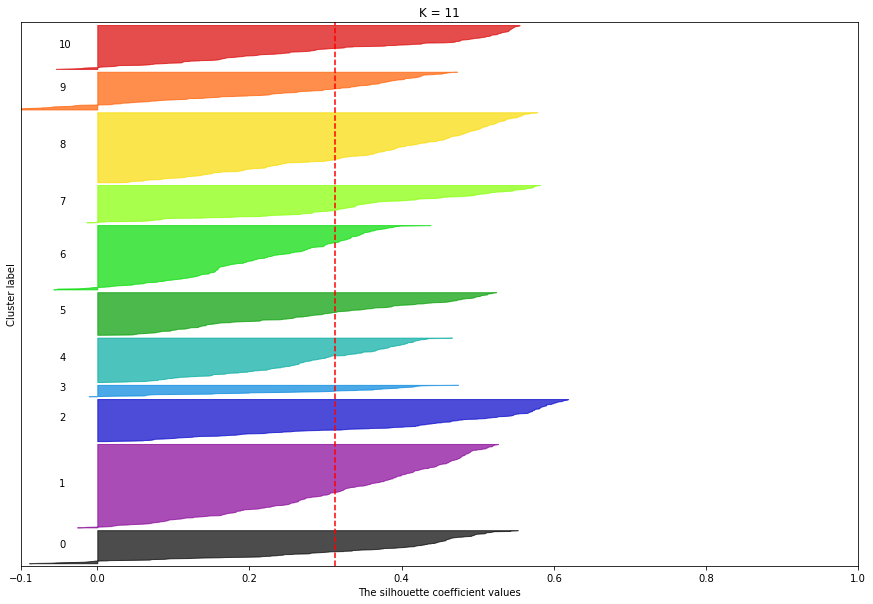

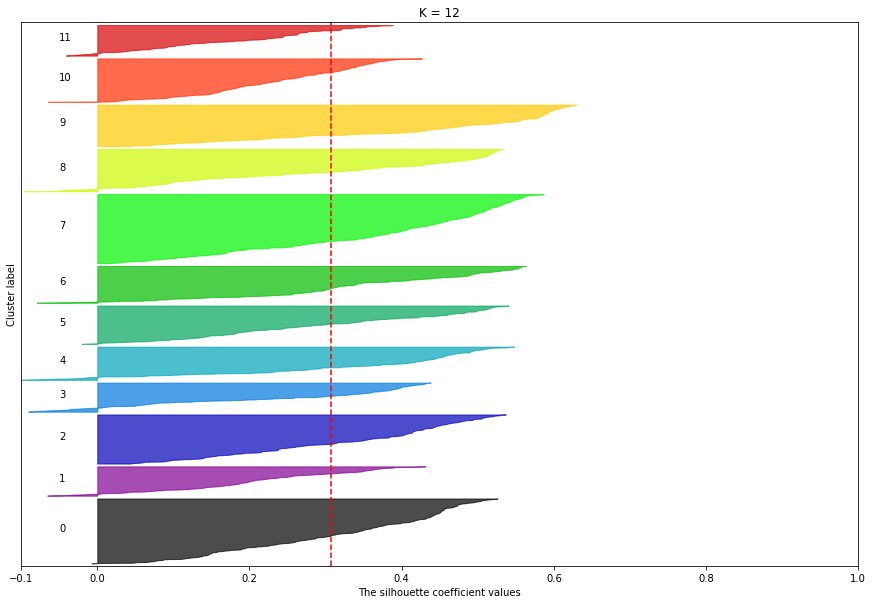

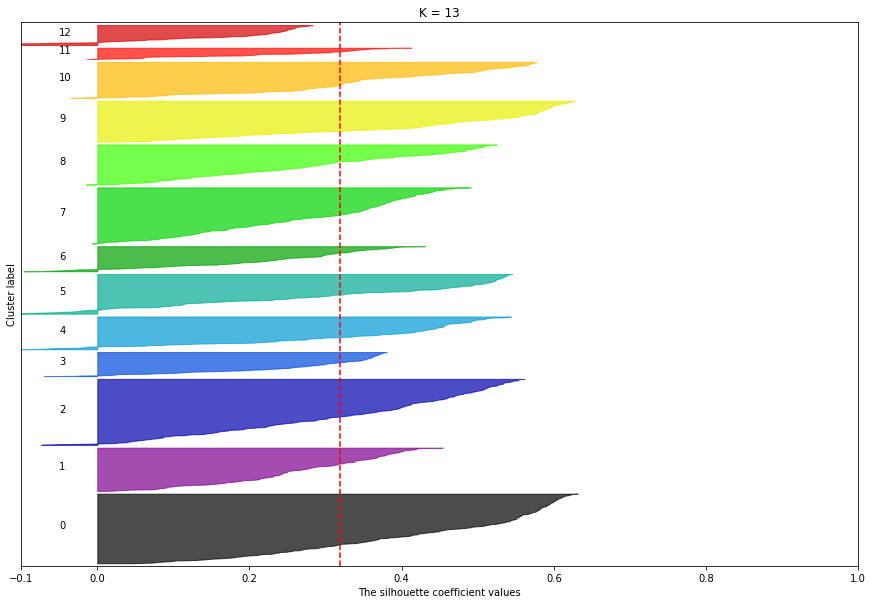

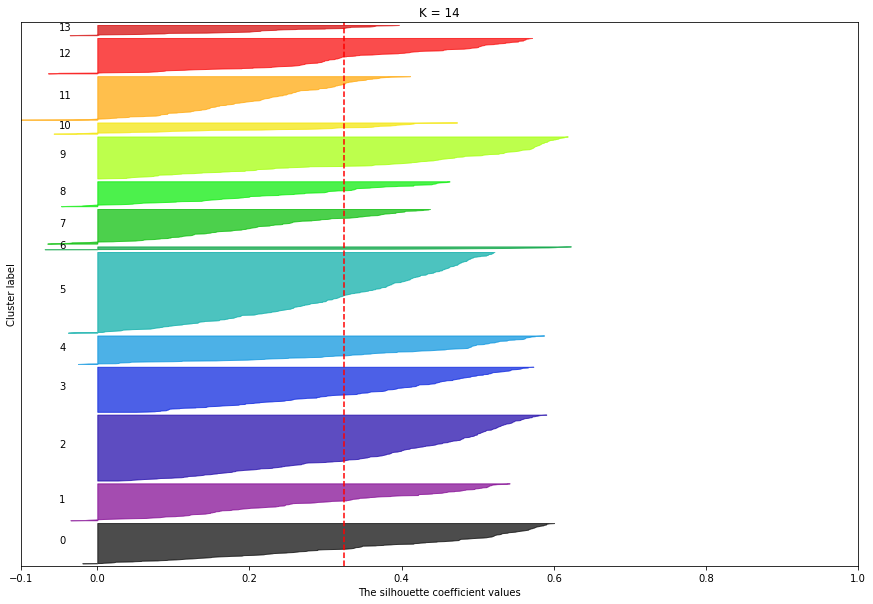

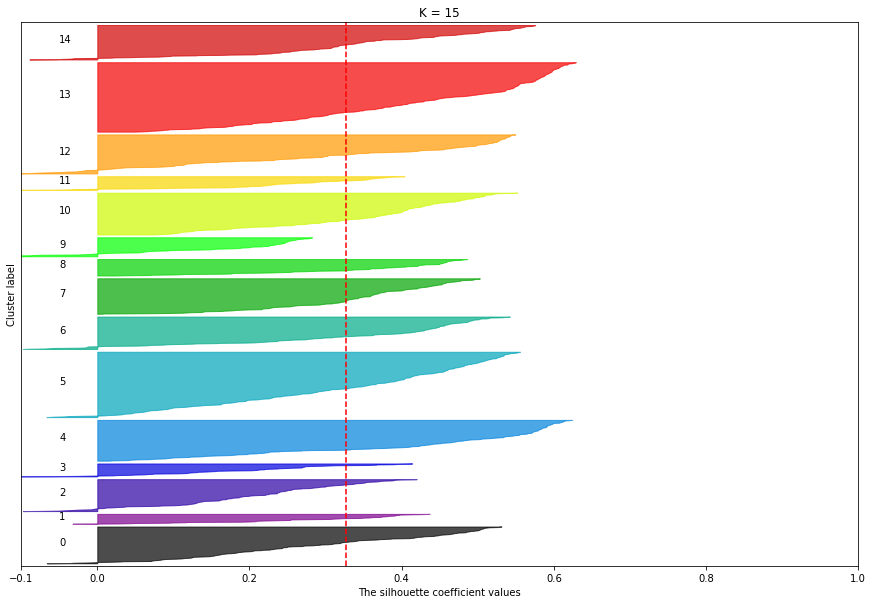

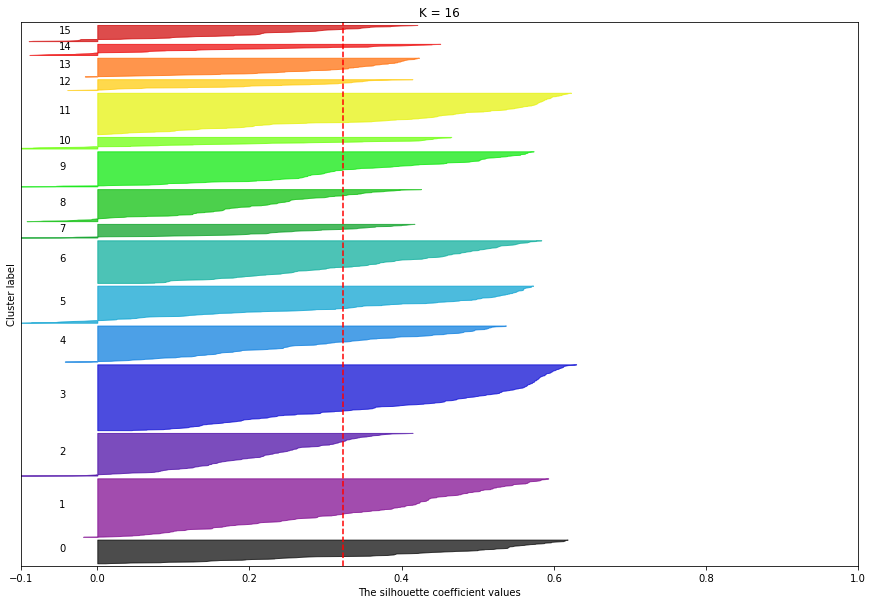

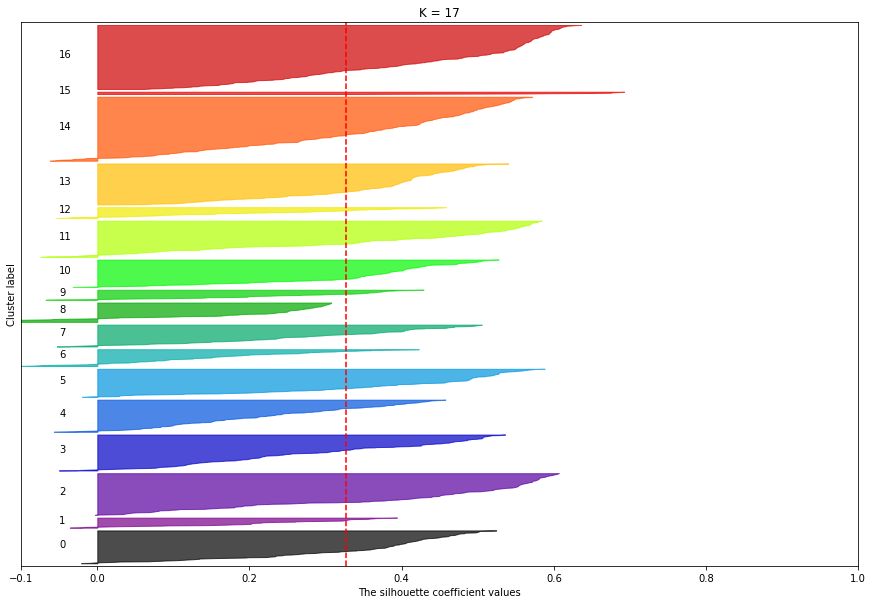

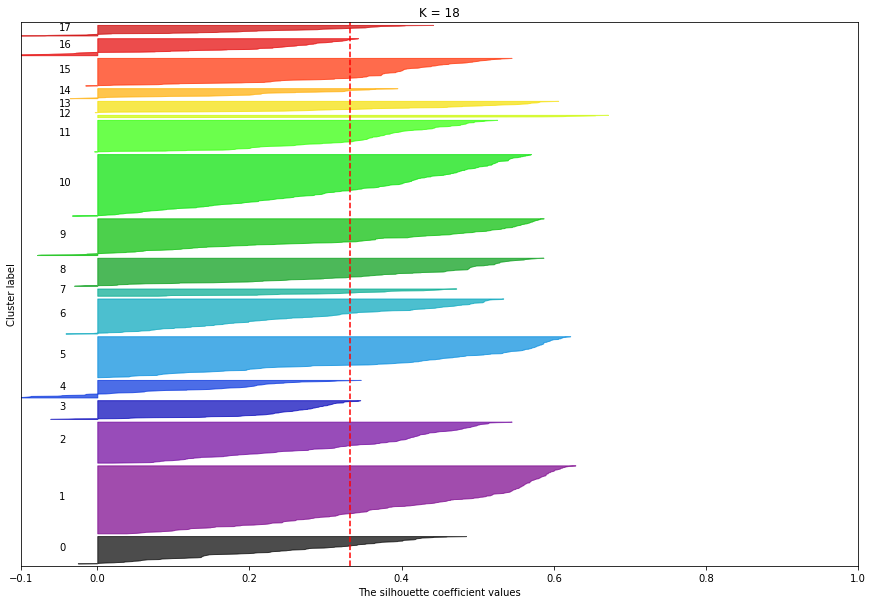

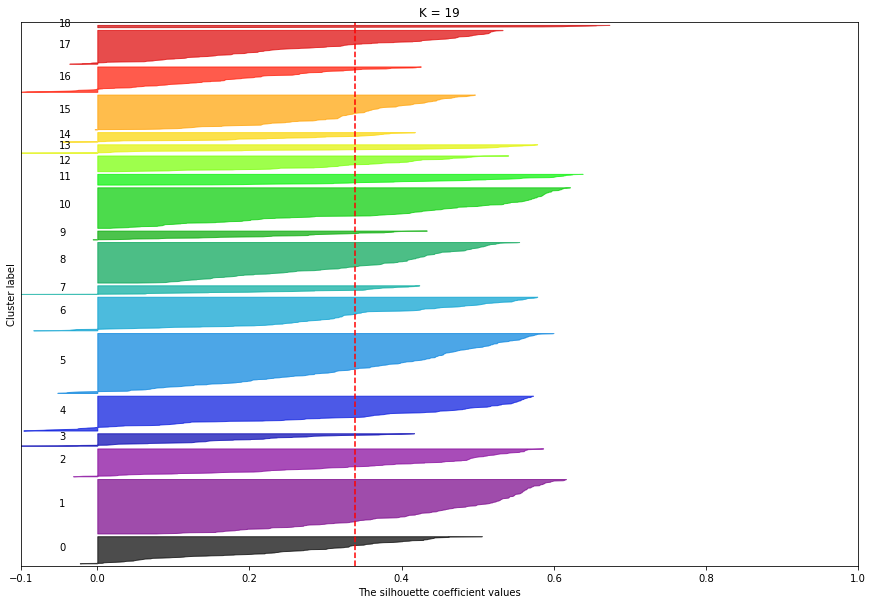

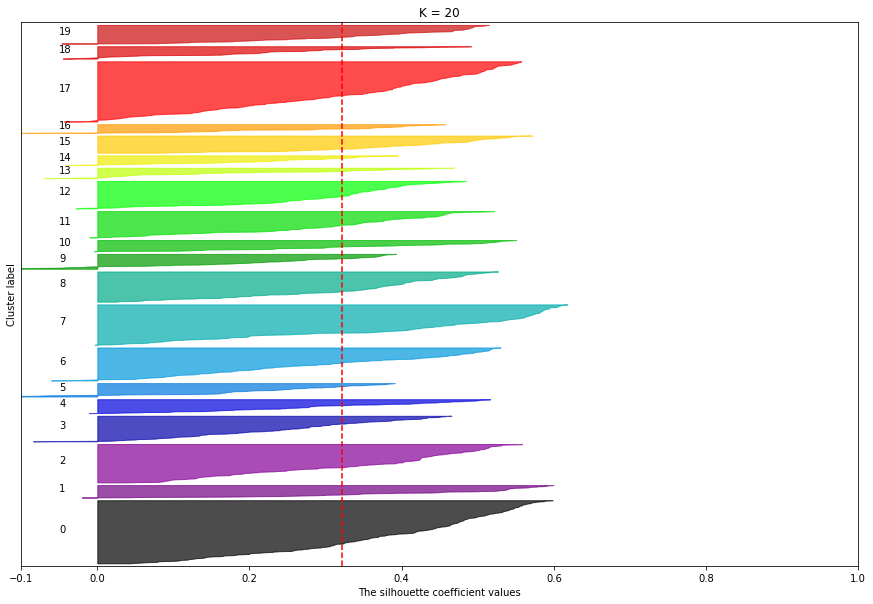

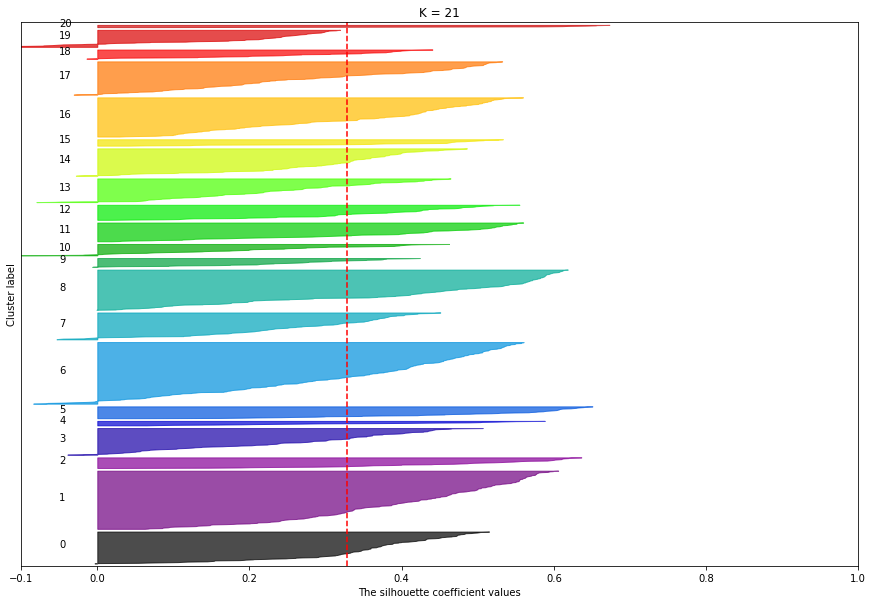

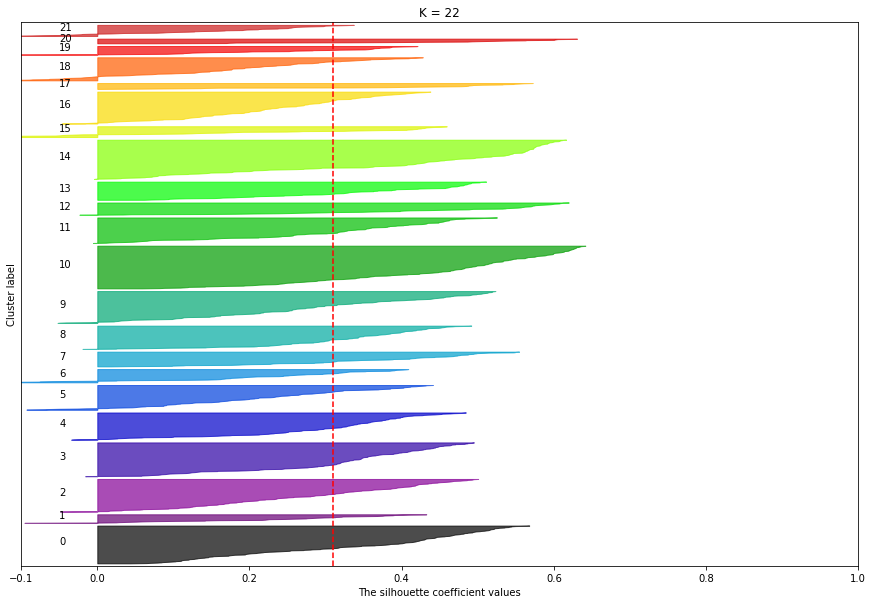

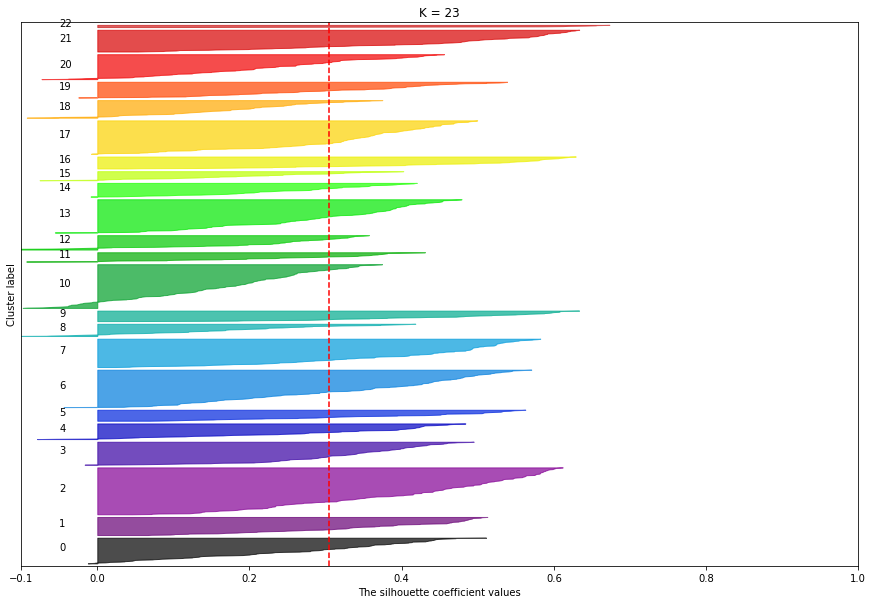

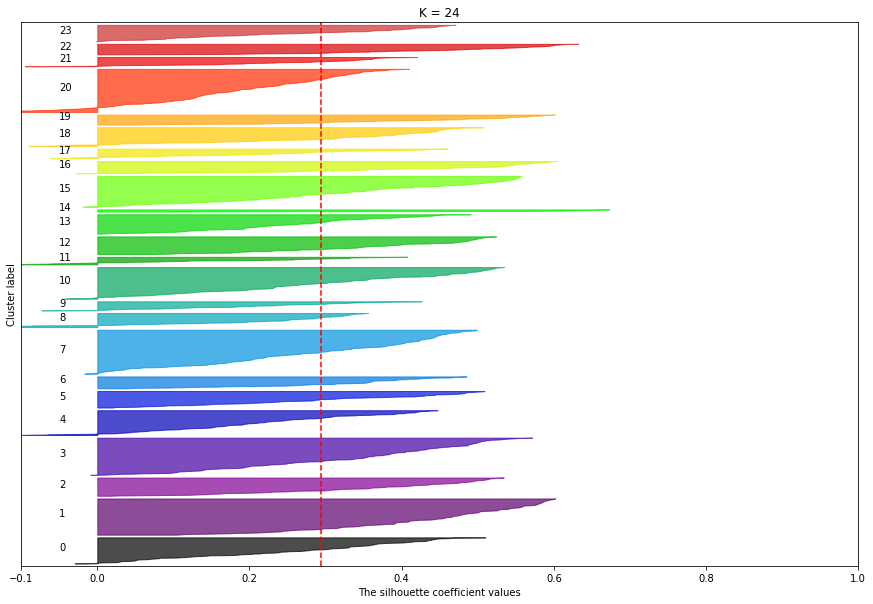

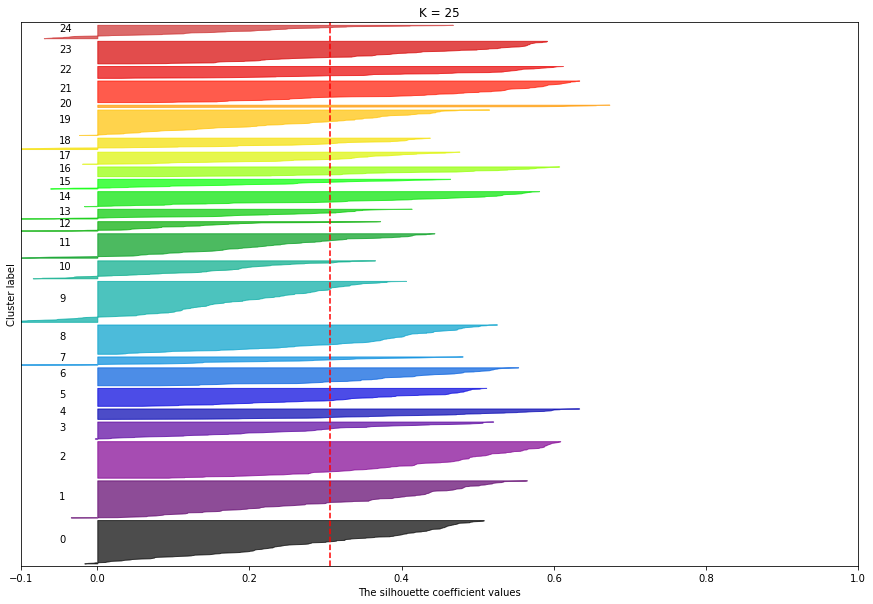

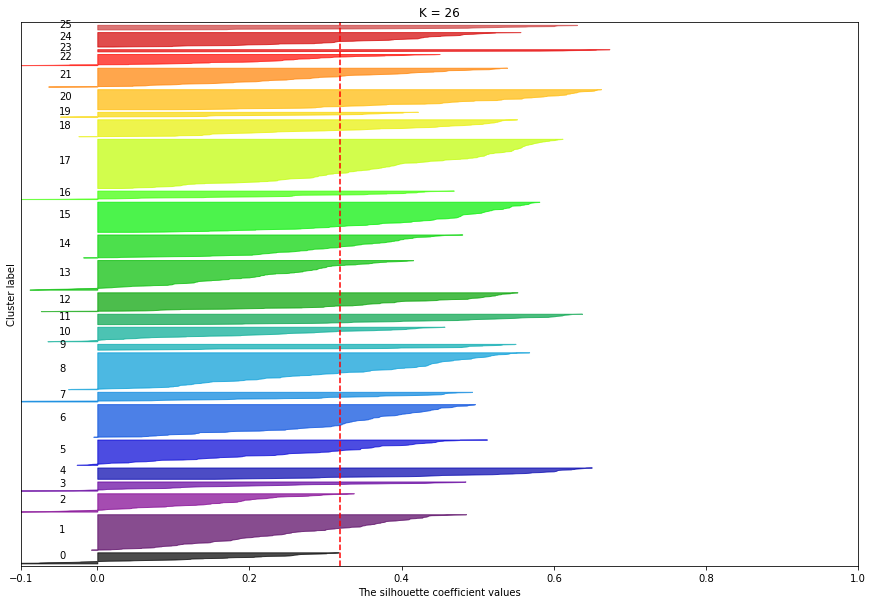

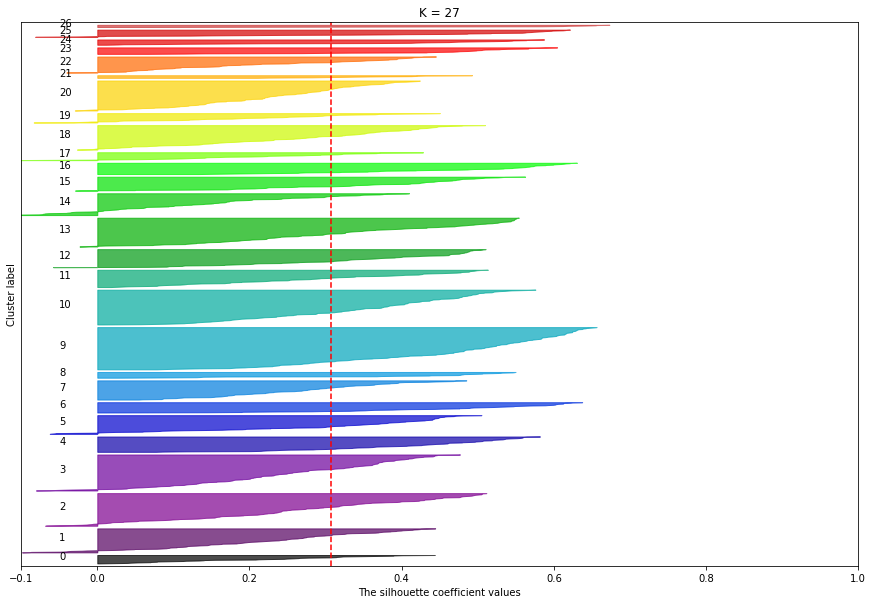

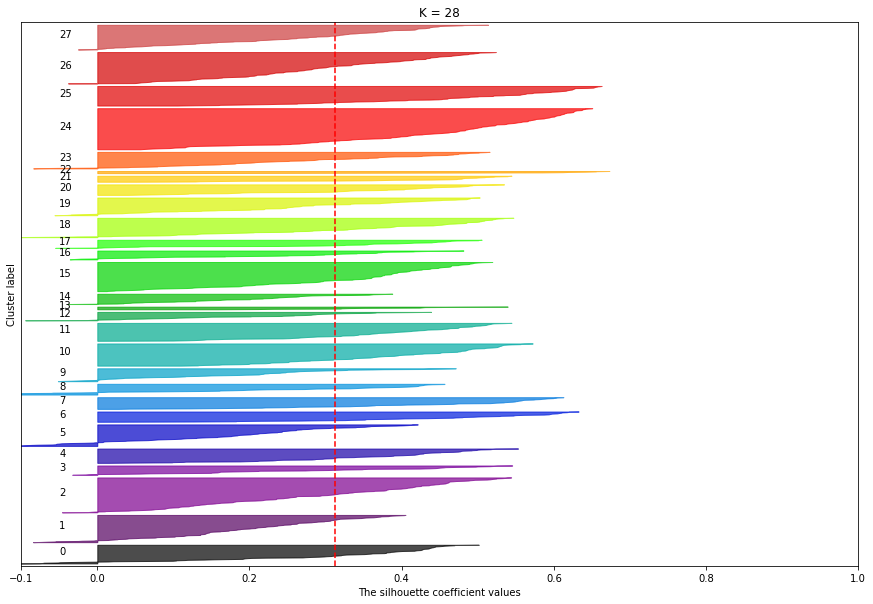

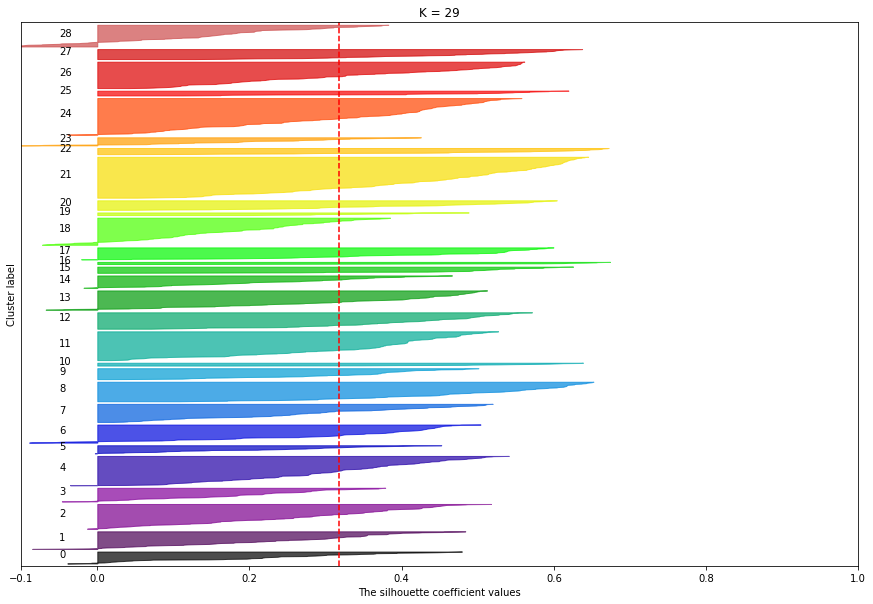

In [79]:
range_n_clusters = np.arange(2,30)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(15, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data[feats]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data[feats])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data[feats], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data[feats], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("K = {}".format(n_clusters))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
For n_clusters = 2 The average silhouette_score is : 0.40811225183136596
For n_clusters = 3 The average silhouette_score is : 0.3283430228750958
For n_clusters = 4 The average silhouette_score is : 0.31718631031237315
For n_clusters = 5 The average silhouette_score is : 0.2782836078378786
For n_clusters = 6 The average silhouette_score is : 0.3083836810634285
For n_clusters = 7 The average silhouette_score is : 0.2933956856085943
For n_clusters = 8 The average silhouette_score is : 0.29285160409162087
For n_clusters = 9 The average silhouette_score is : 0.3060908521736031
For n_clusters = 10 The average silhouette_score is : 0.3070898683026877
For n_clusters = 11 The average silhouette_score is : 0.3123202832477524
For n_clusters = 12 The average silhouette_score is : 0.3067388676272633
For n_clusters = 13 The average silhouette_score is : 0.3184483446493269
For n_clusters = 14 The 

Text(0,0.5,'Average silhouette score')

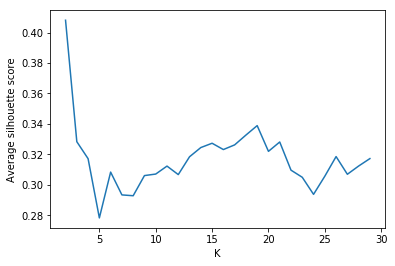

In [81]:

range_n_clusters = list(np.arange(2,30))
print(range_n_clusters)
savergs=[]
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data[feats])

    
    silhouette_avg = silhouette_score(data[feats], cluster_labels)
    savergs.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

plt.plot(range_n_clusters,savergs)
plt.xlabel("K")
plt.ylabel("Average silhouette score")


In [87]:
np.array(range_n_clusters[5:])[savergs[5:]==max(savergs[5:])][0]

19

A partir de la anterior gráfica, se deduce que el **número óptimo de clusters es 19.**

# Segunda Parte

In [56]:
compras = pd.read_csv("BreadBasket_DMS.csv")

In [57]:
compras.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [58]:
dummies = pd.get_dummies(compras['Item'], prefix='Item')

In [59]:
compras = pd.concat([compras, dummies], axis=1)
compras.drop('Item', axis=1, inplace=True)

In [60]:
compras.head()

,Date,Time,Transaction,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,...,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge
0,2016-10-30,09:58:11,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
compras = compras.groupby(['Date','Time','Transaction']).sum()

In [62]:
compras.head()

Item_Adjustment  \
Date       Time     Transaction                    
2016-10-30 09:58:11 1                          0   
           10:05:34 2                          0   
           10:07:57 3                          0   
           10:08:41 4                          0   
           10:13:03 5                          0   

                                 Item_Afternoon with the baker  \
Date       Time     Transaction                                  
2016-10-30 09:58:11 1                                        0   
           10:05:34 2                                        0   
           10:07:57 3                                        0   
           10:08:41 4                                        0   
           10:13:03 5                                        0   

                                 Item_Alfajores  Item_Argentina Night  \
Date       Time     Transaction                                         
2016-10-30 09:58:11 1                         0                     0   
           10:05:34 2                         0                     0   
           10:07:57 3                         0                     0   
           10:08:41 4                         0                     0   
           10:13:03 5                         0                     0   

                                 Item_Art Tray  Item_Bacon  Item_Baguette  \
Date       Time     Transaction                                             
2016-10-30 09:58:11 1                        0           0              0   
           10:05:34 2                        0           0              0   
           10:07:57 3                        0           0              0   
           10:08:41 4                        0           0              0   
           10:13:03 5                        0           0              0   

                                 Item_Bakewell  Item_Bare Popcorn  \
Date       Time     Transaction                                     
2016-10-30 09:58:11 1                        0                  0   
           10:05:34 2                        0                  0   
           10:07:57 3                        0                  0   
           10:08:41 4                        0                  0   
           10:13:03 5                        0                  0   

                                 Item_Basket          ...            \
Date       Time     Transaction                       ...             
2016-10-30 09:58:11 1                      0          ...             
           10:05:34 2                      0          ...             
           10:07:57 3                      0          ...             
           10:08:41 4                      0          ...             
           10:13:03 5                      0          ...             

                                 Item_The BART  Item_The Nomad  Item_Tiffin  \
Date       Time     Transaction                                               
2016-10-30 09:58:11 1                        0               0            0   
           10:05:34 2                        0               0            0   
           10:07:57 3                        0               0            0   
           10:08:41 4                        0               0            0   
           10:13:03 5                        0               0            0   

                                 Item_Toast  Item_Truffles  Item_Tshirt  \
Date       Time     Transaction                                           
2016-10-30 09:58:11 1                     0              0            0   
           10:05:34 2                     0              0            0   
           10:07:57 3                     0              0            0   
           10:08:41 4                     0              0            0   
           10:13:03 5                     0              0            0   

                                 Item_Valentine's card  Item_Vegan Feast  \
Date       Time

In [63]:
compras.reset_index( inplace=True)


In [64]:
compras.head()

,Date,Time,Transaction,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,...,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge
0,2016-10-30,09:58:11,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-10-30,10:07:57,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-10-30,10:08:41,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:13:03,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
compras = compras.drop(['Transaction'],axis=1)
# compras['Date'].strftime("%Y%m%d").astype(int)
compras['Date'] = pd.to_datetime(compras['Date'])
compras['Time'] = pd.to_datetime(compras['Time'])

In [66]:
compras.head()

,Date,Time,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,...,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge
0,2016-10-30,2018-11-02 09:58:11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016-10-30,2018-11-02 10:05:34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016-10-30,2018-11-02 10:07:57,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-10-30,2018-11-02 10:08:41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,2018-11-02 10:13:03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
compras['day_of_week'] = compras['Date'].dt.weekday
compras.day_of_week.unique()

array([6, 0, 1, 2, 3, 4, 5])

In [68]:
compras.Time = compras.Time.dt.hour


In [69]:
compras = compras.drop(['Date'],axis=1)

In [70]:
compras.head()

,Time,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,Item_Bare Popcorn,...,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge,day_of_week
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [71]:
data= compras
# data = data.drop(["Time","day_of_week"],axis=1)
# data=(data-data.mean())/data.std()

covMatr = np.array(data.cov())
w, v = LA.eig(covMatr)

In [72]:
data.head()

,Time,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,Item_Bare Popcorn,...,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge,day_of_week
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [73]:
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

In [74]:
print(w)
print(v)

[5.77449240e+00 3.84647543e+00 4.96604140e-01 2.48233000e-01
 1.41786958e-01 1.03008864e-01 9.72936262e-02 8.55637134e-02
 7.96923815e-02 6.87170915e-02 6.49017099e-02 5.69728647e-02
 4.27978818e-02 3.94813573e-02 3.82215641e-02 3.74495893e-02
 3.62250597e-02 3.60475716e-02 3.26832199e-02 3.03949874e-02
 2.76990982e-02 2.22952037e-02 2.03976982e-02 1.84565506e-02
 1.71002675e-02 1.55469686e-02 1.51301442e-02 1.47171414e-02
 1.43322516e-02 1.24922182e-02 1.23976794e-02 1.21793853e-02
 1.03028990e-02 8.35566775e-03 7.77520009e-03 6.50065587e-03
 5.99843582e-03 5.93698080e-03 5.59982870e-03 5.10667175e-03
 4.99389403e-03 4.74758549e-03 3.93500639e-03 3.49536350e-03
 2.92840295e-03 2.89623852e-03 2.44665431e-03 1.94138979e-03
 1.71911082e-03 1.66192492e-03 1.45027604e-03 1.35509438e-03
 1.31223523e-03 1.24370251e-03 1.24200137e-03 1.20880467e-03
 1.20485218e-03 1.16338615e-03 1.14600115e-03 1.13680944e-03
 9.39485981e-04 8.53824410e-04 8.35231413e-04 8.30320420e-04
 7.72150077e-04 7.358977

In [75]:
def pve(m,v,data):
#     ans = 0
#     assert(len(data.columns)==len(v[:,0]))
    return sum(data.dot(v[:,m])**2)/len(data)
def totVar(v,data):
    ans =0
    for i in range(len(data.columns)):
        ans+= sum(data.iloc[:,i]**2)/len(data)
    return ans

In [76]:
PVE = []
for i in range(len(data.columns)):
    PVE.append(pve(i,v,data)/totVar(v,data))

(0, 10)

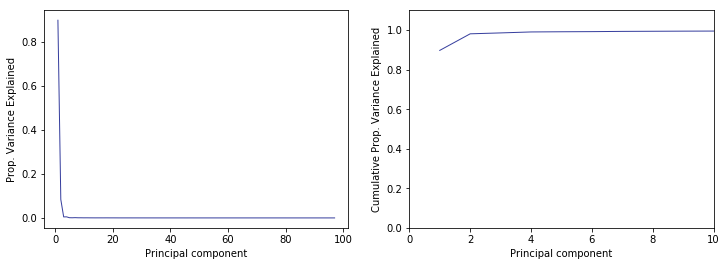

In [79]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(np.arange(1,len(PVE)+1),PVE,linewidth = 1,c="#373F9E")
# plt.scatter(np.arange(1,len(PVE)+1),PVE,linewidth = 1,edgecolors='#373F9E', facecolors='none')
plt.xlabel("Principal component")
plt.ylabel("Prop. Variance Explained")
# plt.ylim(0,1.1)


PVE= np.array(PVE)
cumulativePVE = np.cumsum(PVE)


plt.subplot(1,2,2)
plt.plot(np.arange(1,len(PVE)+1),cumulativePVE,linewidth = 1,c='#373F9E')
# plt.scatter(np.arange(1,len(PVE)+1),cumulativePVE,linewidth = 1,edgecolors='#373F9E', facecolors='none')
plt.xlabel("Principal component")
plt.ylabel("Cumulative Prop. Variance Explained")
plt.ylim(0,1.1)
plt.xlim(0,10)
# plt.plot([0,20],[0.8,0.8],c='black',linestyle='--')

In [235]:
phi1 = v[:,0]
phi2 = v[:,1]

In [80]:
vectors = []
for i in range(2):
    vectors.append(v[:,i])
    

In [81]:
def project(a,b):
    return np.dot(a,b)/(np.sqrt(np.dot(a,a)))

newCoords = []
# names= []
for index, row in data.iterrows():
#    print row['c1'], row['c2']
    vect = (row.values)
#     newCoords.append([project(phi1,vect),project(phi2,vect),row["Unnamed: 0"]])
    newCoord = []
    for v in vectors:
        newCoord.append(project(v,vect))
        
    newCoords.append(newCoord)
#     names.append(row["Unnamed: 0"])
newCoords = np.array(newCoords)

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
For n_clusters = 80 The average silhouette_score is : 0.969562135634214
For n_clusters = 81 The average silhouette_score is : 0.970382095349673
For n_clusters = 82 The average silhouette_score is : 0.9706397929227825
For n_clusters = 83 The average silhouette_score is : 0.9715450631537287
For n_clusters = 84 The average silhouette_score is : 0.9719387318361181
For n_clusters = 85 The average silhouette_score is : 0.9724754288606327
For n_clusters = 86 The average silhouette_score is : 0.9727598869185715
For n_clusters = 87 The average silhouette_score is : 0.9731415079906761
For n_clusters = 88 The average silhouette_score is : 0.9730432016749876
For n_clusters = 89 The average silhouette_score is : 0.9734206842775922
For n_clusters = 90 The average silhouette_score is : 0.9735886380168096
For n_clusters = 91 The average silhouette_score is : 0.9736558619672102
For n_clusters = 92 The average silhouette_sc

Text(0,0.5,'Average silhouette score')

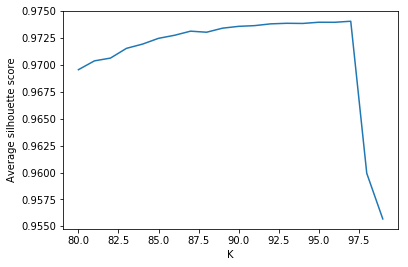

In [156]:

range_n_clusters = list(np.arange(80,100))
print(range_n_clusters)
savergs=[]
inertias =[]
for n_clusters in range_n_clusters:

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(newCoords)
    inertias.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(newCoords, cluster_labels)
    savergs.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

plt.plot(range_n_clusters,savergs)
plt.xlabel("K")
plt.ylabel("Average silhouette score")

In [157]:
clusterer = KMeans(n_clusters=97, random_state=10)
cluster_labels = clusterer.fit_predict(newCoords)

In [158]:

compras['cluster'] = cluster_labels

# Algunos clusters interesantes

# Veganos

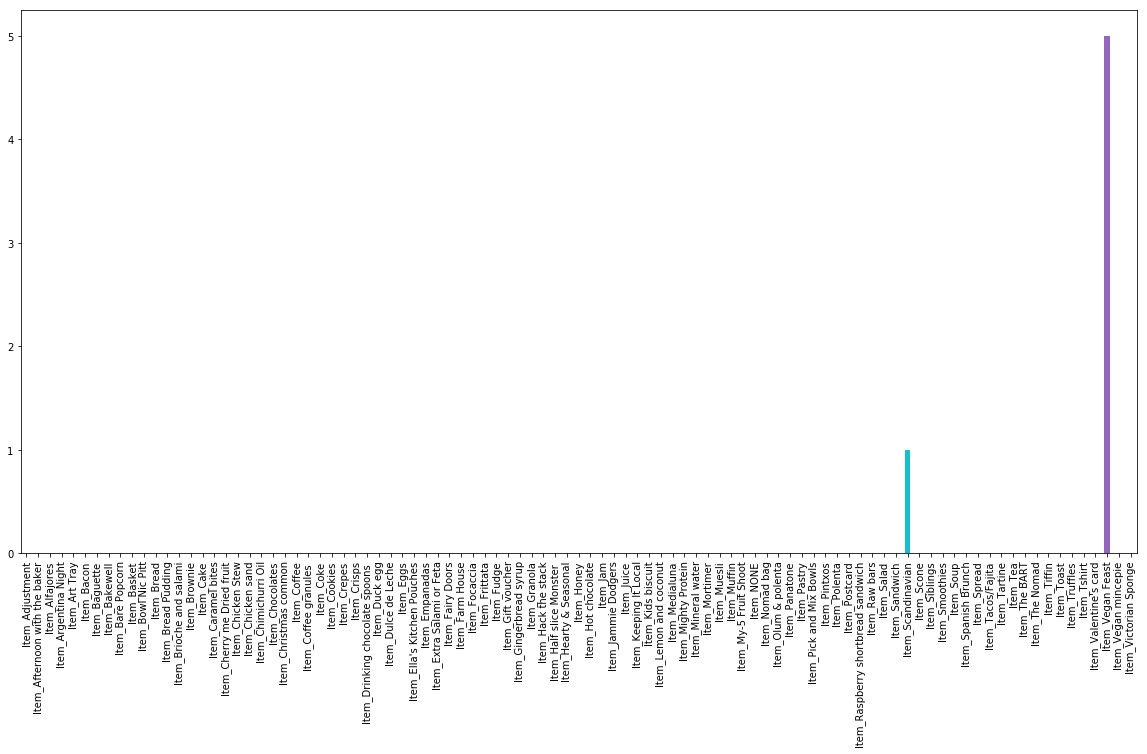

In [256]:
compras[compras.cluster==67].sum()[1:-2].plot.bar(fig=plt.figure(figsize=(20,10)))

# Comida

La gente compra sopa con pan y sanduche con comida.

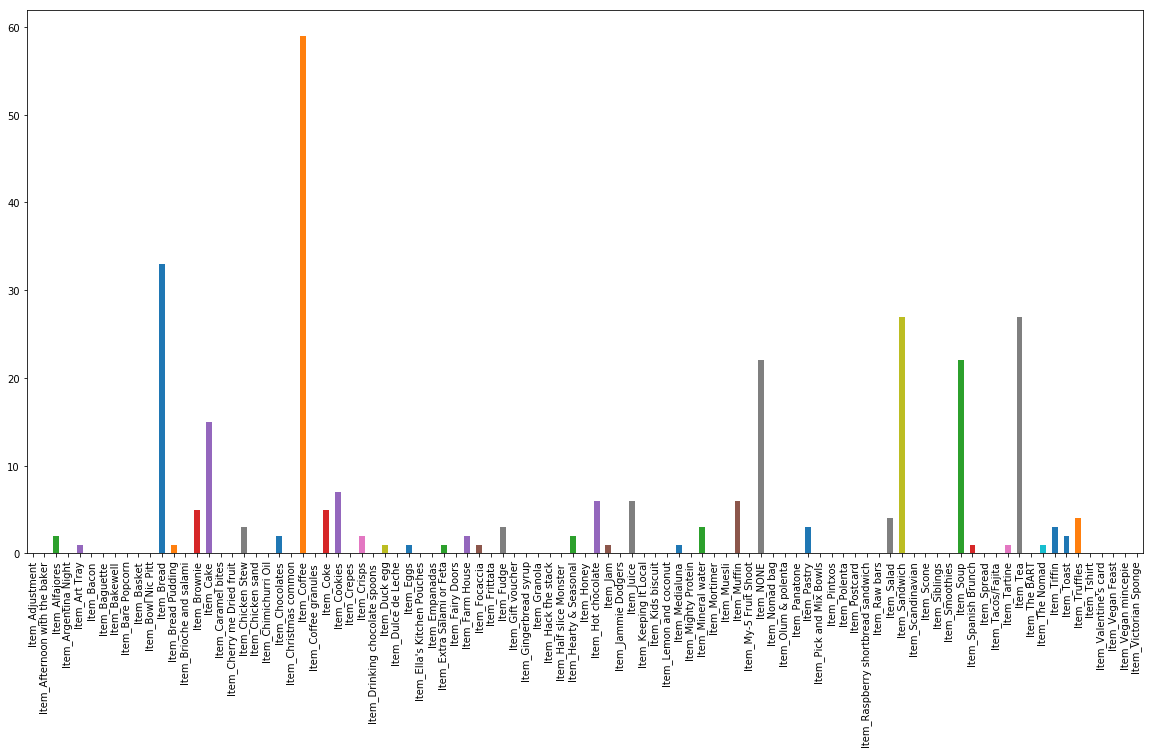

In [242]:
compras[compras.cluster==54].sum()[1:-2].plot.bar(fig=plt.figure(figsize=(20,10)))

## Turistas

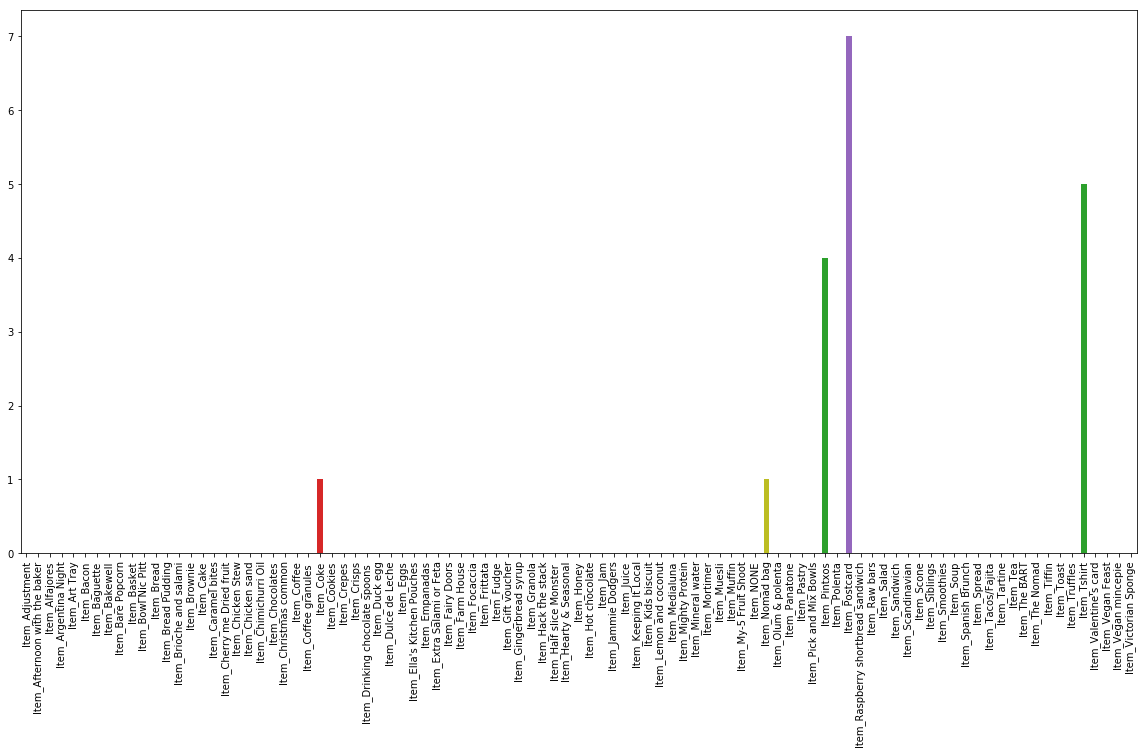

In [209]:
compras[compras.cluster==24].sum()[1:-2].plot.bar(fig=plt.figure(figsize=(20,10)))
